In [1]:
from IPython.display import Image

# STEP5 역전파 이론
수치 미분은 계산 비용과 정확도 면에서 문제가 있었다.  
구세주로 등장한 역전파는 미분을 효율적으로 계산하면서도, 결과값의 오차도 더 작다.

## 5.1 연쇄 법칙
역전파를 이해하는 열쇠는 연쇄 법칙(chain rule)이다.  
연쇄 법칙에 따르면 합성 함수의 미분은 각 함수를 미분한 후 곱한 것과 같다.  

예를 들어 y=F(x)라는 함수가 있다고 하자.  
이 함수는 a = A(x), b = B(a), y = C(b)라는 세 함수로 구성되어 있다.
이를 계산 그래프로 나타내면 아래와 같다.

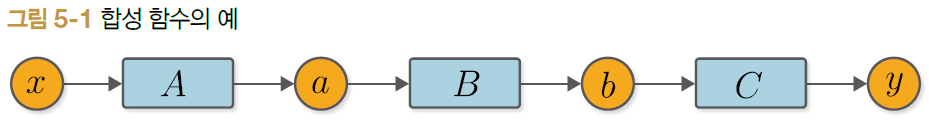

In [2]:
Image("../밑바닥3 그림과 수식/그림 5-1.png")

이때 x에 대한 y의 미분은 [식 5.1]로 표현할 수 있다.

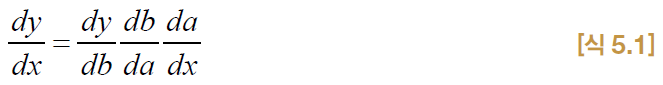

In [3]:
Image("../밑바닥3 그림과 수식/식 5.1.png")

즉, 합성 함수의 미분은 각 함수의 미분들로 분해할 수 있다.  
또한 [식 5.1] 앞에 다음과 같이 dy/dy를 명시할 수도 있다.  
dy/dy는 자신에 대한 미분이라 항상 1이다.  
따라서 생략가능하나 여기서는 역전파를 구현할 때를 대비하여 포함하도록 한다.

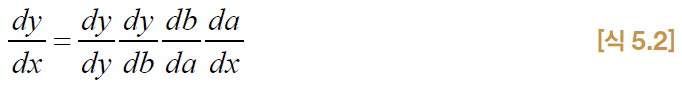

In [4]:
Image("../밑바닥3 그림과 수식/식 5.2.png")

## 5.2 역전파 원리 도출
이제 [식 5.2]를 차분히 살펴보자.
곱하는 순서는 상관없지만, [식 5.3]과 같이 출력에서 입력 방향으로(즉 역방향) 순서대로 계산해보자.

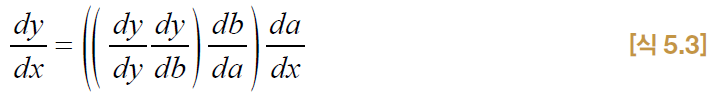

In [5]:
Image("../밑바닥3 그림과 수식/식 5.3.png")

[식 5.3]의 계산 흐름은 [그림 5-2]와 같다.

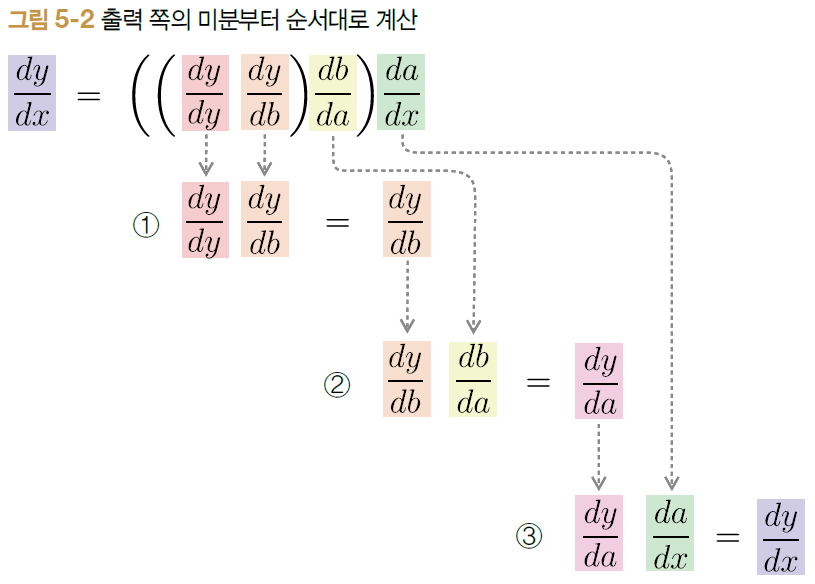

In [6]:
Image("../밑바닥3 그림과 수식/그림 5-2.png")

[그림 5-2]처럼 출력 y에서 입력 x 방향으로 곱하면서 순서대로 미분하면 최종적으로 dy/dx가 구해진다.  
계산 그래프로는 아래와 같다.

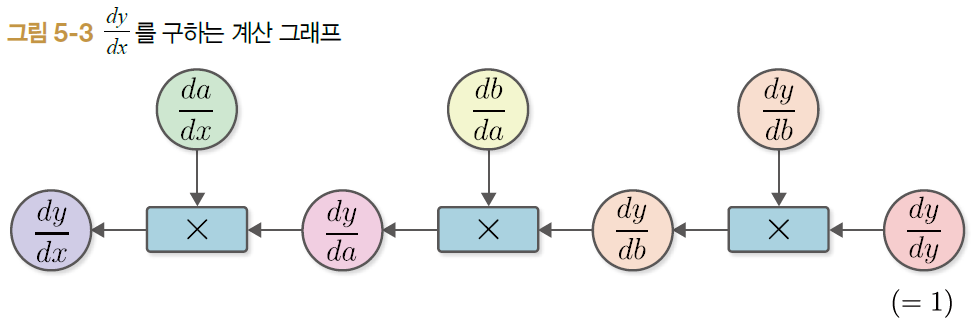

In [8]:
Image("../밑바닥3 그림과 수식/그림 5-3.png")

위 계산 그래프를 아래와 같이 단순화 할 수 있다.

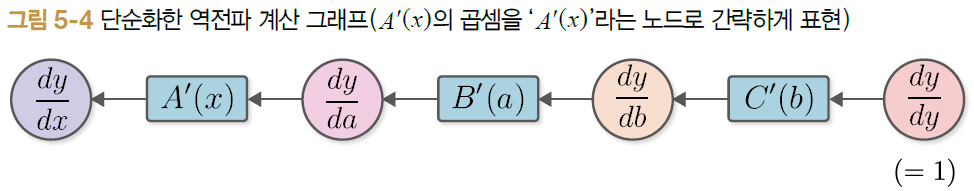

In [9]:
Image("../밑바닥3 그림과 수식/그림 5-4.png")

[그림 5-4]와 같이 도함수의 곱을 함수 노드 하나로 그릴 수 있다.  
[그림 5-4]를 보면 변수 y, b, a, x에 대한 y의 미분값이 오른쪽에서 왼쪽으로 전파되는 것을 알 수 있다.  
이것이 역전파다. 여기서 중요한 점은 전파되는 데이터는 모두 'y의 미분값'이라는 것이다.  

계산 순서를 출력에서 입력 방향으로 정한 이유는 y의 미분값을 전파하기 위해서였다.  
만약 입력에서 출력 방향으로 계산했다면, 전파되는 값은 x의 미분값이다.  

머신러닝은 주로 대량의 매개변수를 입력받아서 마지막에 손실 함수(loss function)을 거쳐 출력을 내는 형태로 진행된다.  
손실 함수의 각 매개변수에 대한 미분을 계산해야 하는데, 이런 경우 미분값을 출력에서 입력 방향으로 전파하면 한 번의 전파만으로 모든 매개변수에 대한 미분을 계산할 수 있다.  
이렇게 계산이 효율적으로 이뤄지기 때문에 미분을 반대 방향으로 전파하는 방식(역전파)을 이용하는 것이다.

## 5.3 계산 그래프로 살펴보기
순전파 계산 그래프와 역전파 계산 그래프를 나란히 놓고 보자. 

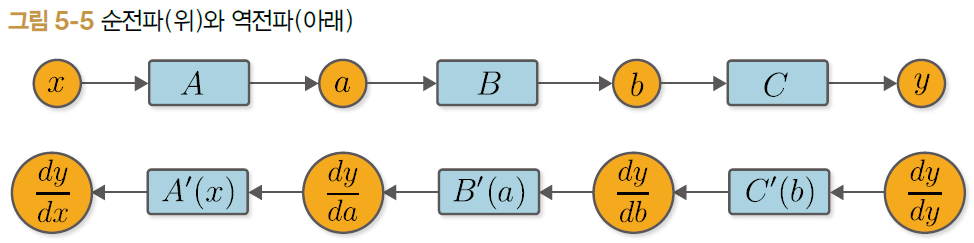

In [10]:
Image("../밑바닥3 그림과 수식/그림 5-5.png")

이렇게 비교하니 순전파와 역전파의 관계가 명확하게 보인다.  
각 변수와 함수가 대응되는 것을 볼 수 있다.  

[그림 5-5]의 함수 노드 C'(b)에 주목해보자.  
여기서 주의할 점은 C'(b)를 계산하려면 b값이 필요하다는 것이다.  
역전파 시에는 순전파 시 이용한 데이터가 필요하다.  
따라서 역전파를 구현하려면 먼저 순전파를 하고, 이때 순전파의 각 함수가 입력 변수의 값을 기억해두어야 한다.